In [1]:
#!/usr/bin/env python3
# coding: utf-8
import sys
import argparse
import random
import numpy as np 
import time
import math
import matplotlib.pyplot as plt
sys.setrecursionlimit(3000)




#modified code get the input of m:
m_range=[5,7,9,11,13]
# fill the array with random values

# sort the array and pick the k-th smallest element from the sorted-array
def sort_and_select(current_array, k) :
    # sort the array
    sorted_current_array = np.sort(current_array)
    return sorted_current_array[k]

def deterministic_select(current_array, k,m=5) : 
    if (len(current_array) <= m) :
        #following the pseudocode in progassignment2
        return sort_and_select(current_array, k)
    else : 
        # I need this array to compute the median-of-medians...
        medians_of_smaller_arrays_of_size_five = []
        
        # first, split current_array into smaller arrays with 5 elements each
        # there might be a better way than what I am doing... but this will work... 
        for i in range(0,len(current_array),5):
            smaller_array_of_size_five = []
            smaller_array_of_size_five.extend([current_array[i]])
            if ((i + 1) < len(current_array)) :
                smaller_array_of_size_five.extend([current_array[i+1]])
            if ((i + 2) < len(current_array)) :
                smaller_array_of_size_five.extend([current_array[i+2]])
            if ((i + 3) < len(current_array)) :
                smaller_array_of_size_five.extend([current_array[i+3]])
            if ((i + 4) < len(current_array)) :
                smaller_array_of_size_five.extend([current_array[i+4]])
            
            # we need each of these cases as len(smaller_array_of_size_five) can be anything between 1 and 5
            # based on len(smaller_array_of_size_five) we are computing the median of smaller_array_of_size_five for each case
            if (len(smaller_array_of_size_five) == 5) :
                medians_of_smaller_arrays_of_size_five.extend([deterministic_select(smaller_array_of_size_five,3)])
            if (len(smaller_array_of_size_five) == 4) :
                medians_of_smaller_arrays_of_size_five.extend([(deterministic_select(smaller_array_of_size_five,2)+deterministic_select(smaller_array_of_size_five,3))/2])
            if (len(smaller_array_of_size_five) == 3) :
                medians_of_smaller_arrays_of_size_five.extend([deterministic_select(smaller_array_of_size_five,2)],)
            if (len(smaller_array_of_size_five) == 2) :
                medians_of_smaller_arrays_of_size_five.extend([(smaller_array_of_size_five[0]+smaller_array_of_size_five[1])/2])
            if (len(smaller_array_of_size_five) == 1) :
                medians_of_smaller_arrays_of_size_five.extend([smaller_array_of_size_five[0]])

        # compute the meadian of the medians_of_smaller_arrays_of_size_five array by recursion
        p = deterministic_select(medians_of_smaller_arrays_of_size_five, int(len(medians_of_smaller_arrays_of_size_five)/2))
        # split the current_array into three sub-arrays: Less_than_p, Equal_to_p and Greater_than_p
        Less_than_p = []
        Equal_to_p = []
        Greater_than_p = []
        for x in current_array : 
            if (x < p) : 
                Less_than_p.extend([x])
            if (x == p) : 
                Equal_to_p.extend([x])
            if (x > p) : 
                Greater_than_p.extend([x])
                
        if (k < len(Less_than_p)) :
            return deterministic_select(Less_than_p, k)
        elif (k >= len(Less_than_p) + len(Equal_to_p)) : 
            return deterministic_select(Greater_than_p, k - len(Less_than_p) - len(Equal_to_p))
        else :
            return p



In [2]:
result=[]
for n in range(1000,10001,1000):
    trial={}
    for i in m_range:
        trial[i]=0
    time_result={}
    for i in m_range:
        time_result[i]=0
    my_array = [random.randint(1,10000*n) for _ in range(n)]
    k=math.ceil(n/2)
    for m in m_range: 
        while trial[m]<=100:
            t0=time.time()
            deterministic_select(my_array, k,m)
            t1=time.time()
            trial[m]+=1
            time_result[m]+=t1-t0
        result.append(time_result[m]/trial[m])

In [3]:
#len(result) checking the result list length is correct

50

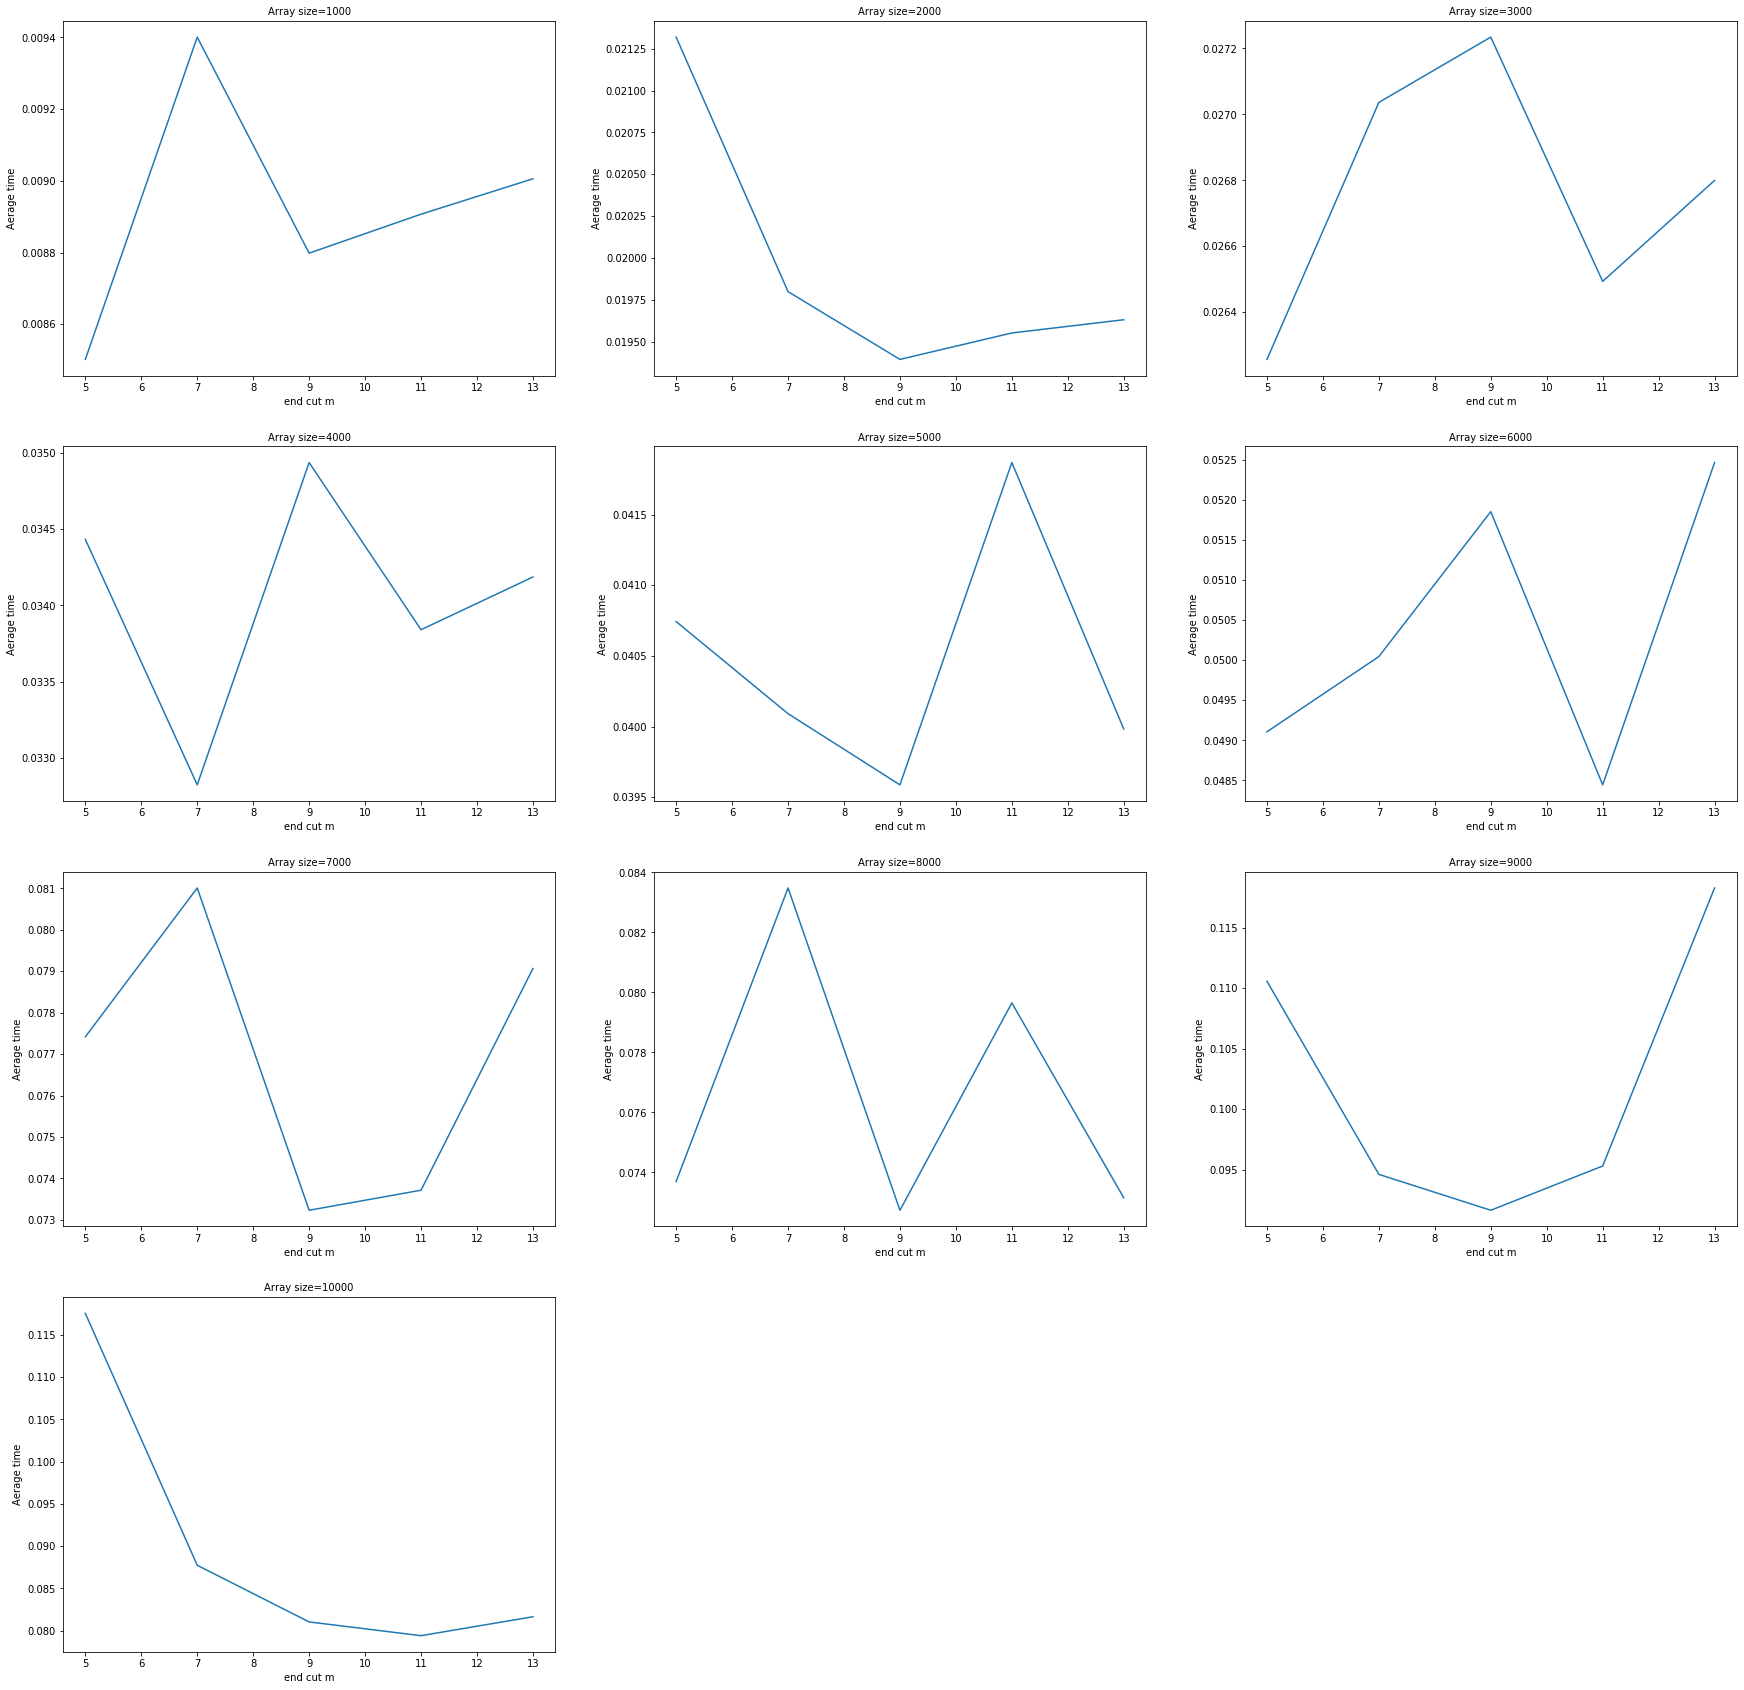

In [11]:
k=1000
plt.figure(figsize=(30,30))
for i in range(1,11):
    y=result[5*(i-1):5*i]
    x=[5,7,9,11,13]
    ax=plt.subplot(4,3,i)
    ax.set_title('Array size=%i' %k,fontsize=10)
    ax.set_ylabel('Aerage time',fontsize=10)
    ax.set_xlabel('end cut m',fontsize=10)
    ax.plot(x,y)
    k+=1000    